# Работа  с таблицей

## Чтение таблицы

для начала установим необходимые для работы библиотеки

In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.4 MB 324 kB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 3.2 kB/s eta 0:00:011
     |████████████████████████████████| 346 kB 67 kB/s s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.2 MB 271 kB/s eta 0:00:01     |████████████████████████████    | 8.1 MB 185 kB/s eta 0:00:07
     |████████████████████████████████| 301 kB 44.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 62.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 60.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 53.1 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


а также импортируем их

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

прочитаем файл, путь к нему можно получить либо в самом jupiterhub либо при помощи команды filepath в командной строке

In [6]:
data = pd.read_csv('/home/aandreeva/hw/hw_2/TRB_10_7/TRB_10_7.tsv', sep='\t')
data.head()

,TGTGCCAGCAGCGGTAGGGGGACACTATTGGGCACCTTC,CASSGRGTLLGTF,TRBV7-9,TRBJ1-2
0,TGTGGACGGAAGGACGAGCAGTACTTC,CGRKDEQYF,TRBV20-1,TRBJ2-7
1,TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT,CSARGVFSEAFF,TRBV20-1,TRBJ1-1
2,TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC,CATNDRGRTYNEQFF,TRBV24-1,TRBJ2-1
3,TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...,CASSLAGLAGCRKLTEETQYF,TRBV27,TRBJ2-5
4,TGTGCCAGCAGCGTAGCAGGGGCGGGGAGTAGCTCCTACGAGCAGT...,CASSVAGAGSSSYEQYF,TRBV9,TRBJ2-7


## Построение графика

данные из файла TRB_10_7.tsv выглядят как т-клеточный репертуар (спасибо хакатону от BG), можем построить гистограммы и сравнить, какие виды TRBV и TRBJ генов встречаются чаще всего.

но для начала переименуем столбцы так, чтобы названия отражали их суть.

In [40]:
data.columns = ['nucleotide_seq', 'amino_acid_seq', 'TRBV', 'TRBJ']
data.head()

,nucleotide_seq,amino_acid_seq,TRBV,TRBJ
0,TGTGGACGGAAGGACGAGCAGTACTTC,CGRKDEQYF,TRBV20-1,TRBJ2-7
1,TGCAGTGCTCGGGGCGTCTTCTCTGAAGCTTTCTTT,CSARGVFSEAFF,TRBV20-1,TRBJ1-1
2,TGTGCCACCAATGACAGGGGGCGCACCTACAATGAGCAGTTCTTC,CATNDRGRTYNEQFF,TRBV24-1,TRBJ2-1
3,TGTGCCAGCAGTTTAGCTGGACTAGCGGGTTGTCGGAAGTTGACGG...,CASSLAGLAGCRKLTEETQYF,TRBV27,TRBJ2-5
4,TGTGCCAGCAGCGTAGCAGGGGCGGGGAGTAGCTCCTACGAGCAGT...,CASSVAGAGSSSYEQYF,TRBV9,TRBJ2-7


строим столбчатую гистограмму

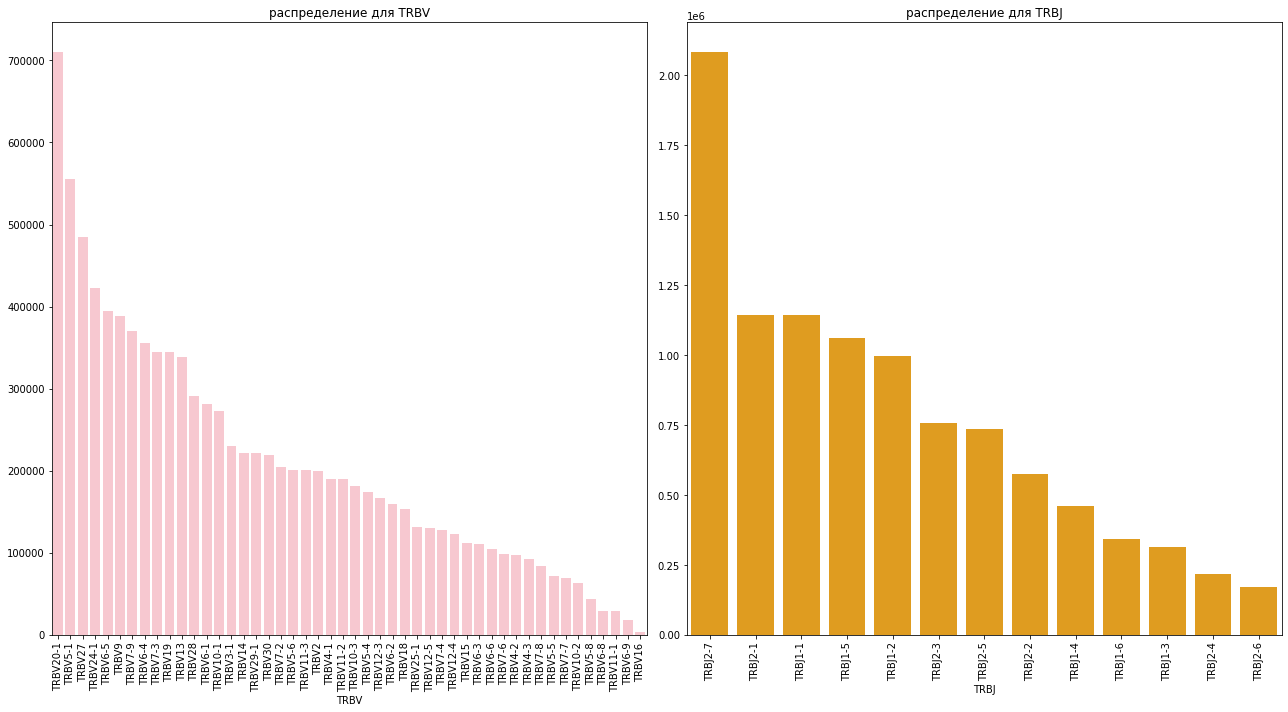

In [56]:
trbv_counts = data['TRBV'].value_counts()
trbj_counts = data['TRBJ'].value_counts()

plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.barplot(x=trbv_counts.index, y=trbv_counts.values, color = 'pink')
plt.title('распределение для TRBV')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=trbj_counts.index, y=trbj_counts.values, color = 'orange')
plt.title('распределение для TRBJ')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

в нашем датасете самыми часто встречающимися являются TRBV20-1 и TRBJ2-7

картинка посвящается следующему заданию

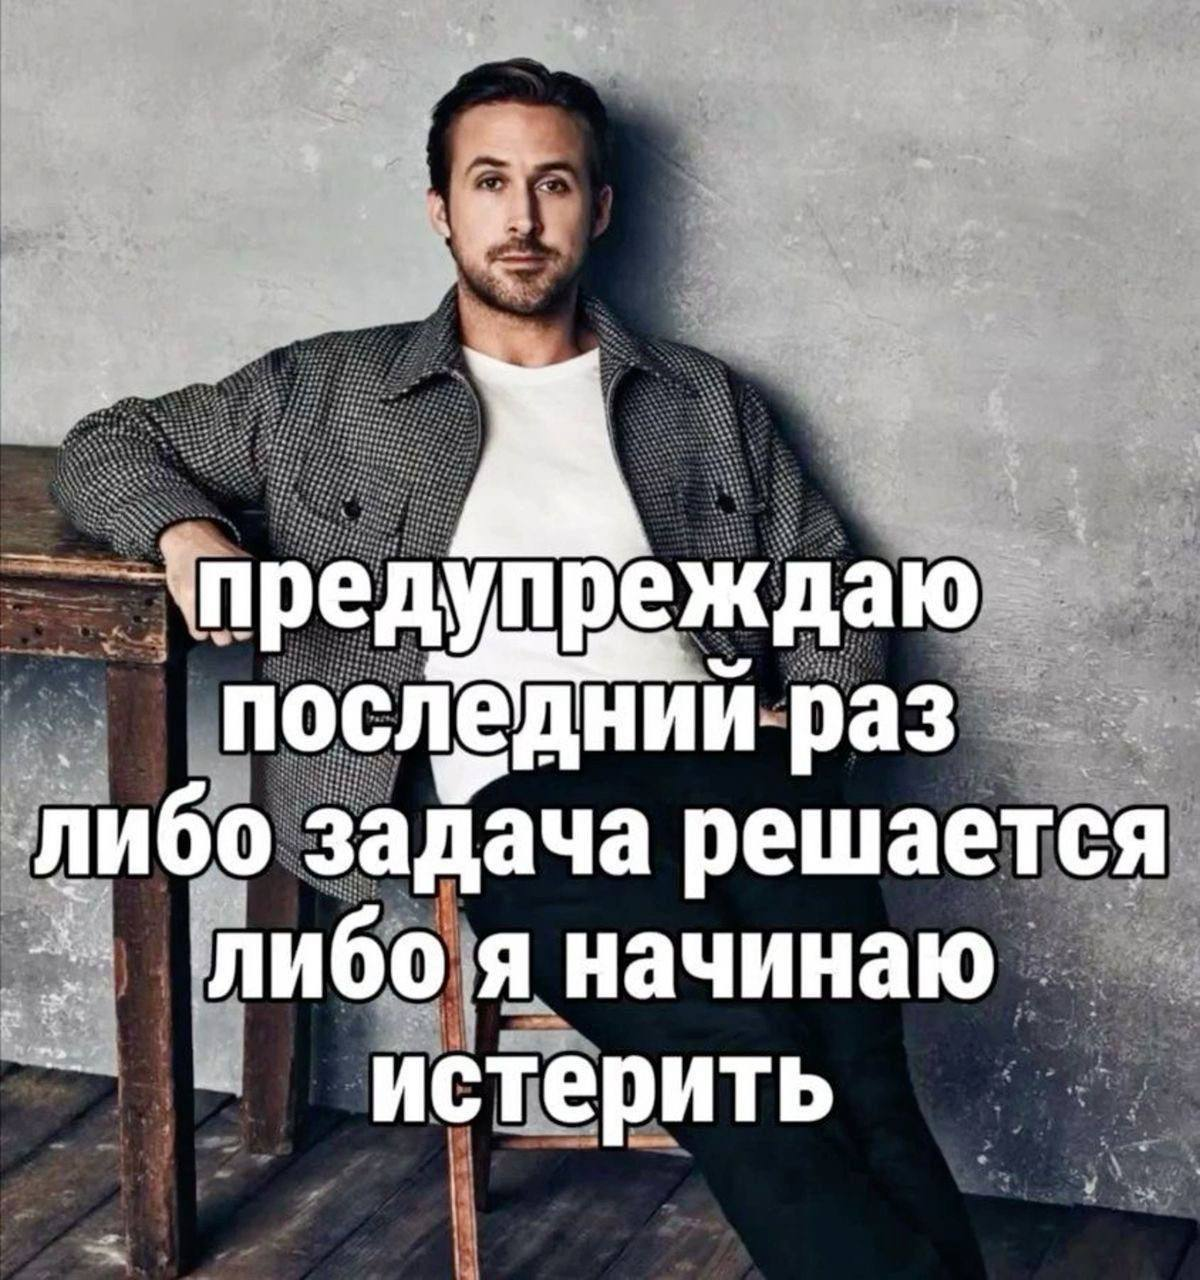

# Работа  с R

In [17]:
pip install rpy2

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 220 kB 2.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 74 kB 179 kB/s  eta 0:00:01
  Using cached cffi-1.17.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (446 kB)
  Created wheel for rpy2: filename=rpy2-3.5.17-cp38-cp38-linux_x86_64.whl size=384491 sha256=5232504fce89c19a6b47aed4b8477e799f6f757d73fe47a59a886d1a7e5f2aa9
  Stored in directory: /home/aandreeva/.cache/pip/wheels/72/7a/08/1d4bd9a7eac6be866c8a78500c0d0006457f022defe8b1f172
Successfully built rpy2
Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext rpy2.ipython

In [2]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [3]:
%%R
install.packages("ggplot2")

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Paris 1) [h

Selection:  6


* installing *source* package ‘colorspace’ ...
** package ‘colorspace’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c colorspace.c -o colorspace.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c init.c -o init.o
gcc -shared -L/opt/R/4.1.2/lib/R/lib -L/usr/local/lib -o colorspace.so colorspace.o init.o -L/opt/R/4.1.2/lib/R/lib -lR


installing to /home/aandreeva/R/x86_64-pc-linux-gnu-library/4.1/00LOCK-colorspace/00new/colorspace/libs
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (colorspace)
* installing *source* package ‘utf8’ ...
** package ‘utf8’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -Iutf8lite/src -fpic  -g -O2  -c as_utf8.c -o as_utf8.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -Iutf8lite/src -fpic  -g -O2  -c bytes.c -o bytes.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -Iutf8lite/src -fpic  -g -O2  -c context.c -o context.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -Iutf8lite/src -fpic  -g -O2  -c init.c -o init.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -Iutf8lite/src -fpic  -g -O2  -c render.c -o render.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -Iutf8lite/src -fpic  -g -O2  -c render_table.c -o render_table.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -Iutf8lite/src -fpic  -g -O2  -c string.c -o string.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -Iutf8lite/src -fpic  -g -O2  -c text.c -o text.o
gcc -I"/opt/R/4.1.

installing to /home/aandreeva/R/x86_64-pc-linux-gnu-library/4.1/00LOCK-utf8/00new/utf8/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (utf8)
* installing *source* package ‘farver’ ...
** package ‘farver’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


g++ -std=gnu++14 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c ColorSpace.cpp -o ColorSpace.o
g++ -std=gnu++14 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c Comparison.cpp -o Comparison.o
g++ -std=gnu++14 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c Conversion.cpp -o Conversion.o
g++ -std=gnu++14 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c encode.cpp -o encode.o
g++ -std=gnu++14 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c farver.cpp -o farver.o
g++ -std=gnu++14 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c init.cpp -o init.o
g++ -std=gnu++14 -shared -L/opt/R/4.1.2/lib/R/lib -L/usr/local/lib -o farver.so ColorSpace.o Comparison.o Conversion.o encode.o farver.o init.o -L/opt/R/4.1.2/lib/R/lib -lR


installing to /home/aandreeva/R/x86_64-pc-linux-gnu-library/4.1/00LOCK-farver/00new/farver/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (farver)
* installing *source* package ‘labeling’ ...
** package ‘labeling’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installa

gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c assumptions.c -o assumptions.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c carry.c -o carry.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c has.c -o has.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c init.c -o init.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c nchar.c -o nchar.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c normalize.c -o normalize.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c read.c -o read.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c rnchar.

installing to /home/aandreeva/R/x86_64-pc-linux-gnu-library/4.1/00LOCK-fansi/00new/fansi/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (fansi)
* installing *source* package ‘magrittr’ ...
** package ‘magrittr’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c pipe.c -o pipe.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c utils.c -o utils.o
gcc -shared -L/opt/R/4.1.2/lib/R/lib -L/usr/local/lib -o magrittr.so pipe.o utils.o -L/opt/R/4.1.2/lib/R/lib -lR


installing to /home/aandreeva/R/x86_64-pc-linux-gnu-library/4.1/00LOCK-magrittr/00new/magrittr/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (magrittr)
* installing *source* package ‘pkgconfig’ ...
** package ‘pkgconfig’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if instal

gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -I../inst/include -fpic  -g -O2  -c ansi.c -o ansi.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -I../inst/include -fpic  -g -O2  -c cleancall.c -o cleancall.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -I../inst/include -fpic  -g -O2  -c diff.c -o diff.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -I../inst/include -fpic  -g -O2  -c errors.c -o errors.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -I../inst/include -fpic  -g -O2  -c glue.c -o glue.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -I../inst/include -fpic  -g -O2  -c init.c -o init.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -I../inst/include -fpic  -g -O2  -c inst.c -o inst.o

installing to /home/aandreeva/R/x86_64-pc-linux-gnu-library/4.1/00LOCK-cli/00new/cli/libs
** R
** exec
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (cli)
* installing *source* package ‘glue’ ...
** package ‘glue’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c glue.c -o glue.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c init.c -o init.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c trim.c -o trim.o
gcc -shared -L/opt/R/4.1.2/lib/R/lib -L/usr/local/lib -o glue.so glue.o init.o trim.o -L/opt/R/4.1.2/lib/R/lib -lR


installing to /home/aandreeva/R/x86_64-pc-linux-gnu-library/4.1/00LOCK-glue/00new/glue/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (glue)
* installing *source* package ‘isoband’ ...
** package ‘isoband’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


g++ -std=gnu++11 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c clip-lines.cpp -o clip-lines.o
g++ -std=gnu++11 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c init.cpp -o init.o
g++ -std=gnu++11 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c isoband.cpp -o isoband.o
g++ -std=gnu++11 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c polygon.cpp -o polygon.o
g++ -std=gnu++11 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c separate-polygons.cpp -o separate-polygons.o
g++ -std=gnu++11 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c test-clip-lines.cpp -o test-clip-lines.o
g++ -std=gnu++11 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -fpic  -g -O2  -c test-runner.cpp -o test-runner.o
g++ -std=gnu++11 -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG   -I/usr/local/include  

installing to /home/aandreeva/R/x86_64-pc-linux-gnu-library/4.1/00LOCK-isoband/00new/isoband/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (isoband)
* installing *source* package ‘rlang’ ...
** package ‘rlang’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG -I./rlang/  -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c capture.c -o capture.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG -I./rlang/  -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c internal.c -o internal.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG -I./rlang/  -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c rlang.c -o rlang.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG -I./rlang/  -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c version.c -o version.o
gcc -shared -L/opt/R/4.1.2/lib/R/lib -L/usr/local/lib -o rlang.so capture.o internal.o rlang.o version.o -L/opt/R/4.1.2/lib/R/lib -lR


installing to /home/aandreeva/R/x86_64-pc-linux-gnu-library/4.1/00LOCK-rlang/00new/rlang/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (rlang)
* installing *source* package ‘withr’ ...
** package ‘withr’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if ins

gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG -I./rlang  -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c altrep-lazy-character.c -o altrep-lazy-character.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG -I./rlang  -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c altrep-rle.c -o altrep-rle.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG -I./rlang  -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c altrep.c -o altrep.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG -I./rlang  -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c arg-counter.c -o arg-counter.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG -I./rlang  -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c arg.c -o arg.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG -I./rlang  -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c assert.c -o assert.o
gcc -I"/opt/R/4.1.2/lib/R/include" -DNDEBUG -I./rlang  -I/usr/local/include  -fvisibility=hidden -fpic  -g -O2  -c bind.c -o bind.o
gcc -I"/op

* installing *source* package ‘ggplot2’ ...
** package ‘ggplot2’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** data
*** moving datasets to lazyload DB
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggplot2)


Installing package into ‘/home/aandreeva/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)
also installing the dependencies ‘colorspace’, ‘utf8’, ‘farver’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘viridisLite’, ‘fansi’, ‘magrittr’, ‘pillar’, ‘pkgconfig’, ‘cli’, ‘glue’, ‘gtable’, ‘isoband’, ‘lifecycle’, ‘rlang’, ‘scales’, ‘tibble’, ‘vctrs’, ‘withr’

trying URL 'https://ftp.belnet.be/mirror/CRAN/src/contrib/colorspace_2.1-1.tar.gz'
Content type 'application/octet-stream' length 2141289 bytes (2.0 MB)
downloaded 2.0 MB

trying URL 'https://ftp.belnet.be/mirror/CRAN/src/contrib/utf8_1.2.4.tar.gz'
Content type 'application/octet-stream' length 241081 bytes (235 KB)
downloaded 235 KB

trying URL 'https://ftp.belnet.be/mirror/CRAN/src/contrib/farver_2.1.2.tar.gz'
Content type 'application/octet-stream' length 1275981 bytes (1.2 MB)
downloaded 1.2 MB

trying URL 'https://ftp.belnet.be/mirror/CRAN/src/contrib/labeling_0.4.3.tar.gz'
Content type 'application/octet-stream' length 

преобразуем наш датасет в R объект

In [73]:
trbv_counts_df = pd.DataFrame(trbv_counts)
trbj_counts_df = pd.DataFrame(trbj_counts)

In [82]:
trbv_counts_df = trbv_counts.reset_index()
trbv_counts_df.columns = ['TRBV', 'count']

trbj_counts_df = trbj_counts.reset_index()
trbj_counts_df.columns = ['TRBJ', 'count']

In [83]:
trbv_counts_r = pandas2ri.py2rpy(trbv_counts_df)
%R -i trbv_counts_r

trbj_counts_r = pandas2ri.py2rpy(trbj_counts_df)
%R -i trbj_counts_r

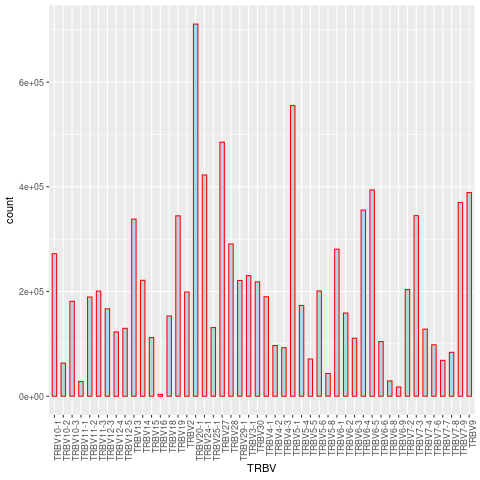

In [80]:
%%R

library(ggplot2)

ggplot(data = trbv_counts_r, mapping = aes(x = TRBV, y = count)) +
  geom_bar(stat = "identity", width = 0.5, color = "red", fill = "lightblue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

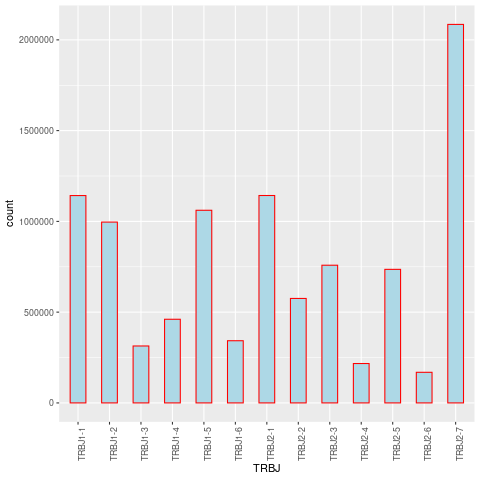

In [84]:
%%R

library(ggplot2)

ggplot(data = trbj_counts_r, mapping = aes(x = TRBJ, y = count)) +
  geom_bar(stat = "identity", width = 0.5, color = "red", fill = "lightblue") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))